https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

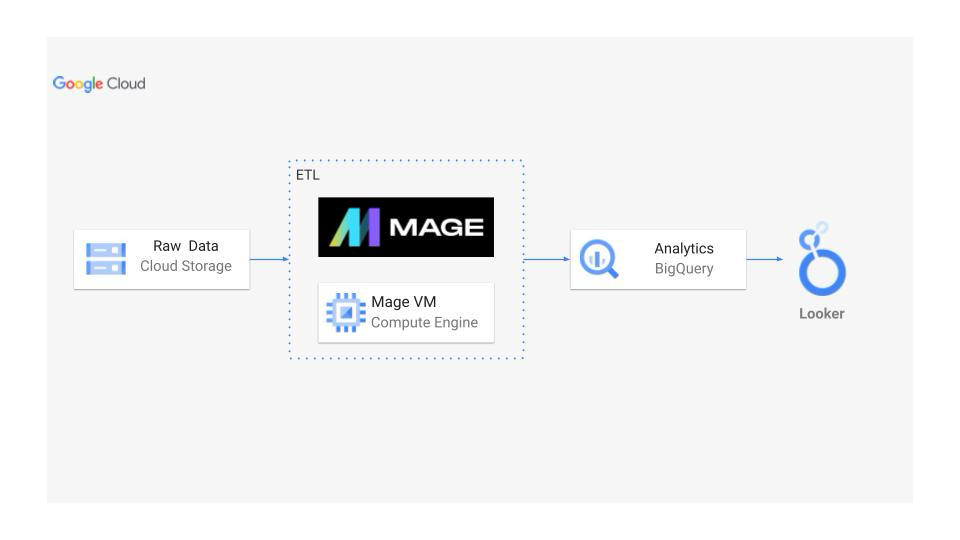

In [64]:
pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [69]:
df = pd.read_csv('data/uber_data.csv')

In [70]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [71]:
### We have to convert the flat file into fact and dimension table

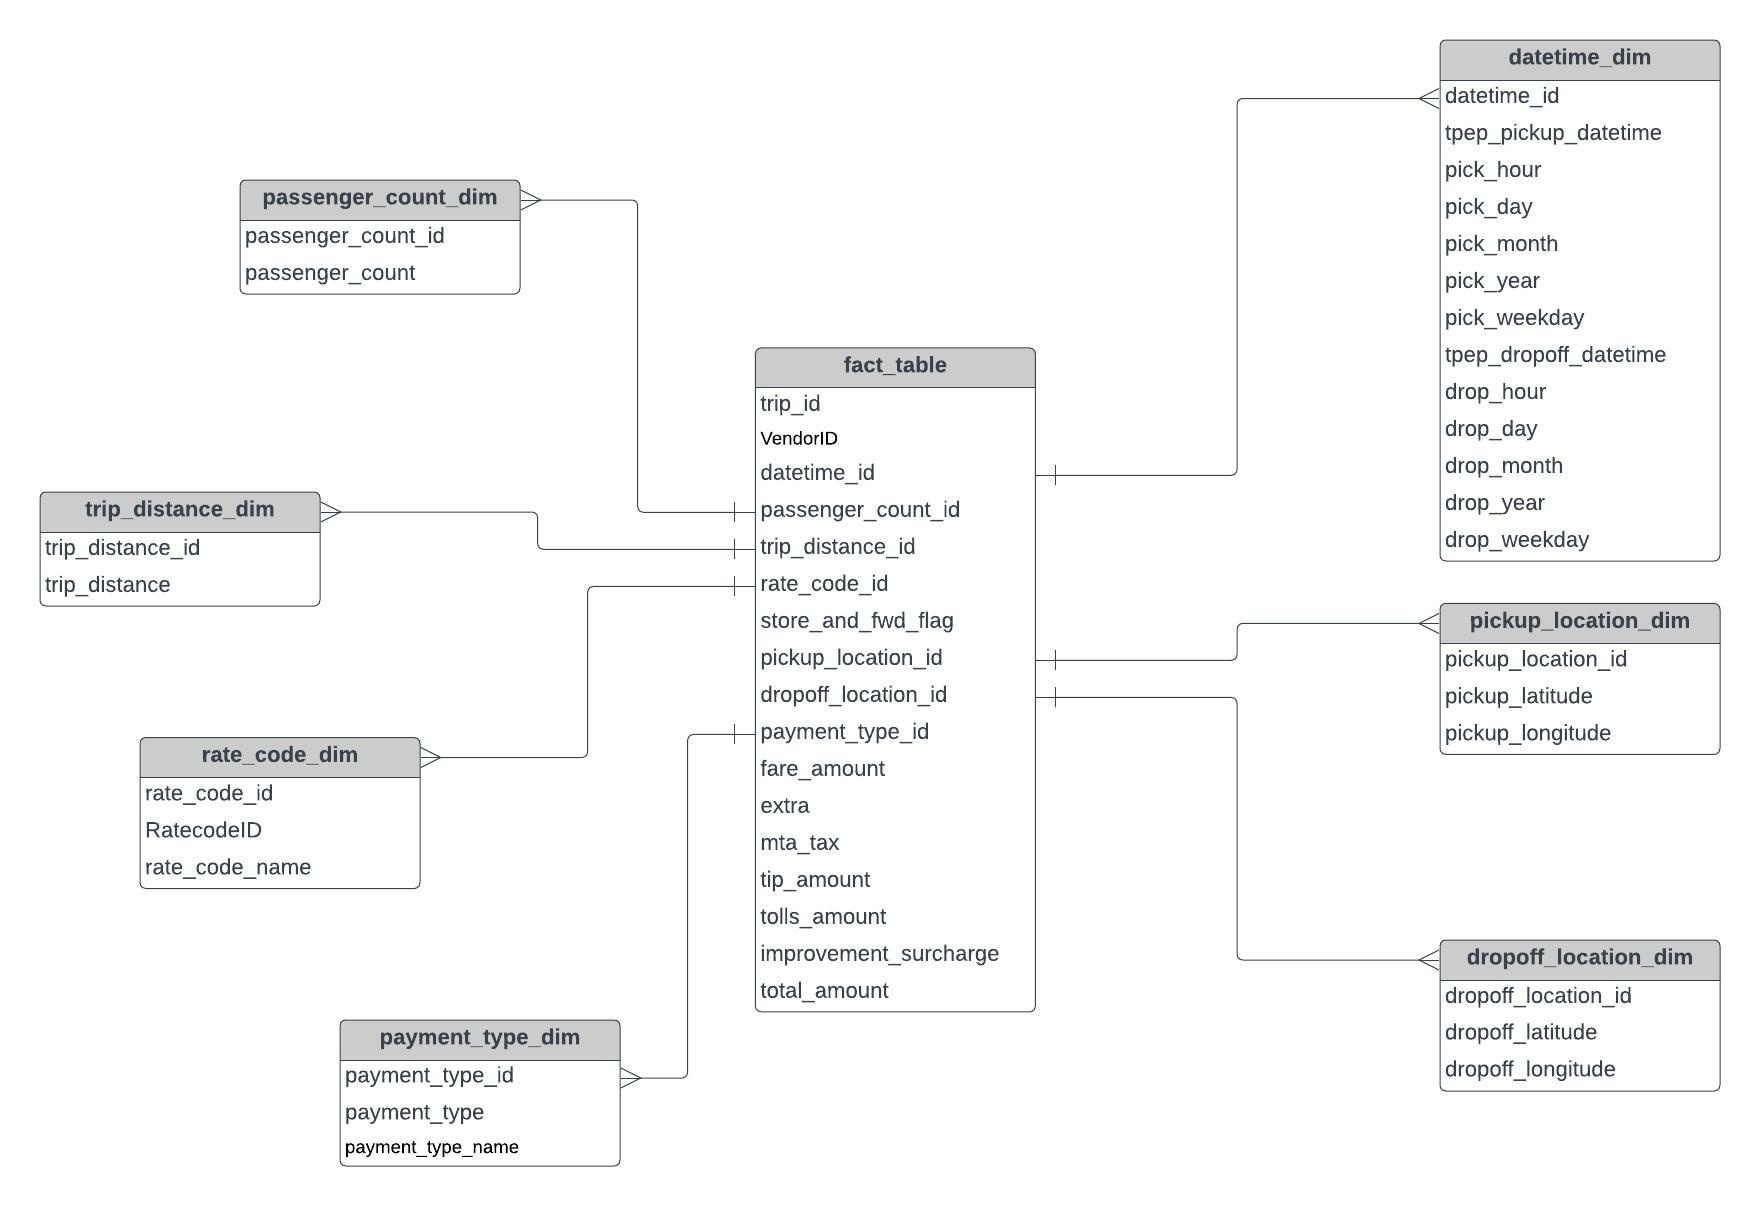

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [74]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [75]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [77]:
df = df.drop_duplicates().reset_index(drop = True)
df['trip_id'] = df.index

In [78]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4


In [79]:
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop = True)
datetime_dim['tpep_pickup_datetime'] = datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday

In [80]:
datetime_dim['datetime_id'] = datetime_dim.index

In [81]:
datetime_dim.insert(0, 'datetime_id', datetime_dim.pop('datetime_id'))

In [82]:
datetime_dim.head()

,datetime_id,tpep_pickup_datetime,tpep_dropoff_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01,2016-03-01 00:07:55,0,1,3,2016,1,0,1,3,2016,1
1,1,2016-03-01,2016-03-01 00:11:06,0,1,3,2016,1,0,1,3,2016,1
2,2,2016-03-01,2016-03-01 00:31:06,0,1,3,2016,1,0,1,3,2016,1
3,3,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1
4,4,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1


In [83]:
datetime_dim.head()

,datetime_id,tpep_pickup_datetime,tpep_dropoff_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01,2016-03-01 00:07:55,0,1,3,2016,1,0,1,3,2016,1
1,1,2016-03-01,2016-03-01 00:11:06,0,1,3,2016,1,0,1,3,2016,1
2,2,2016-03-01,2016-03-01 00:31:06,0,1,3,2016,1,0,1,3,2016,1
3,3,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1
4,4,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1


In [84]:
###Passenger table

In [85]:
passenger_count_dim = df[['passenger_count']].reset_index(drop = True)

In [86]:
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

In [87]:
trip_distance_dim = df[['trip_distance']].reset_index(drop = True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id', 'trip_distance']]

In [88]:
passenger_count_dim.head()

,passenger_count_id,passenger_count
0,0,1
1,1,1
2,2,2
3,3,3
4,4,5


In [89]:
trip_distance_dim.head()

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


In [90]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].reset_index(drop = True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID', 'rate_code_name']]

In [91]:
rate_code_dim.head()

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark


In [92]:
pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].reset_index(drop = True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']]

In [93]:
dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop = True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [94]:
pickup_location_dim.head()

,pickup_location_id,pickup_latitude,pickup_longitude
0,0,40.765152,-73.976746
1,1,40.767925,-73.983482
2,2,40.644810,-73.782021
3,3,40.769814,-73.863419
4,4,40.792183,-73.971741


In [95]:
dropoff_location_dim.head()

,dropoff_location_id,dropoff_latitude,dropoff_longitude
0,0,40.746128,-74.004265
1,1,40.733166,-74.005943
2,2,40.675770,-73.974541
3,3,40.757767,-73.969650
4,4,40.695053,-74.177170


In [96]:
payment_type_name = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id', 'payment_type_name']]

In [97]:
payment_type_dim.head()

,payment_type_id,payment_type_name
0,0,Credit card
1,1,Credit card
2,2,Credit card
3,3,Credit card
4,4,Credit card


In [98]:
df['payment_type'].unique()

array([1, 2, 3, 4])

pip install ace_tools

In [100]:
from functools import reduce
# List of dimension tables with their respective keys
dim_tables = [
    (passenger_count_dim, 'passenger_count_id'),
    (trip_distance_dim, 'trip_distance_id'),
    (rate_code_dim, 'rate_code_id'),
    (pickup_location_dim, 'pickup_location_id'),
    (dropoff_location_dim, 'dropoff_location_id'),
    (datetime_dim, 'datetime_id'),
    (payment_type_dim, 'payment_type_id')
]

# Merge all tables using reduce
fact_table = reduce(lambda left, right: left.merge(right[0], left_on='trip_id', right_on=right[1]), 
                    dim_tables, df)

# Select the necessary columns
fact_table = fact_table[[
    'trip_id', 'VendorID', 'datetime_id', 'passenger_count_id',
    'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 
    'pickup_location_id', 'dropoff_location_id', 'payment_type_id', 
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount'
]]


In [101]:
fact_table

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,99995,99995,99995,99995,N,99995,99995,99995,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,99996,1,99996,99996,99996,99996,N,99996,99996,99996,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,99997,1,99997,99997,99997,99997,N,99997,99997,99997,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,99998,2,99998,99998,99998,99998,N,99998,99998,99998,5.5,0.5,0.5,1.36,0.00,0.3,8.16


In [102]:
# Set dark background style
plt.style.use("dark_background")

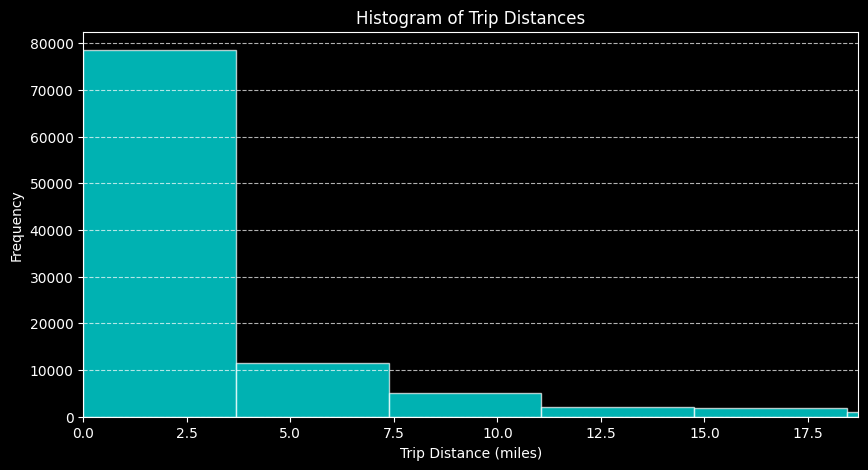

In [103]:
# Figure 1: Histogram of Trip Distances
plt.figure(figsize=(10, 5))
plt.hist(df["trip_distance"], bins=50, color="cyan", edgecolor="white", alpha=0.7)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Histogram of Trip Distances")
plt.xlim(0, df["trip_distance"].quantile(0.99))  # Limit to 99th percentile to avoid extreme values
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [104]:
#Conclusion: Right-Skewed data which means shorter trips are more than longer trips

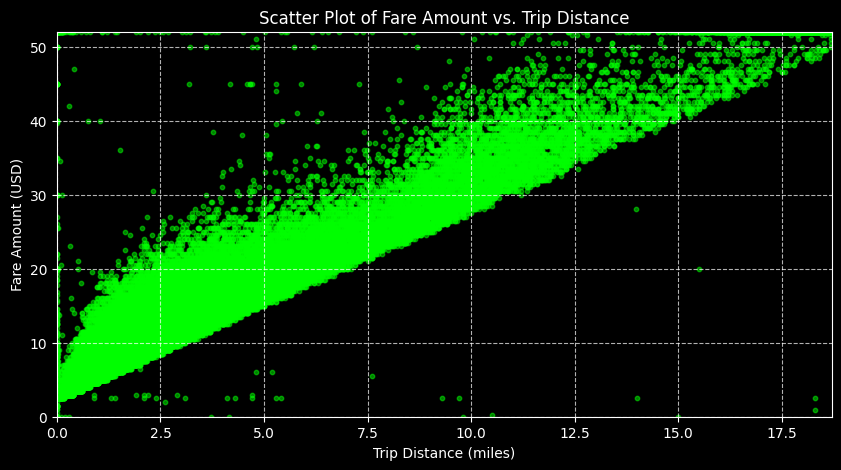

In [105]:
plt.figure(figsize=(10, 5))
plt.scatter(df["trip_distance"], df["fare_amount"], alpha=0.5, color="lime", s=10)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount (USD)")
plt.title("Scatter Plot of Fare Amount vs. Trip Distance")
plt.xlim(0, df["trip_distance"].quantile(0.99))  # Limiting extreme values
plt.ylim(0, df["fare_amount"].quantile(0.99))  # Limiting extreme values
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [106]:
#Conclusion: The corelation between the distance and fare is positive with some outliers due to surge pricing

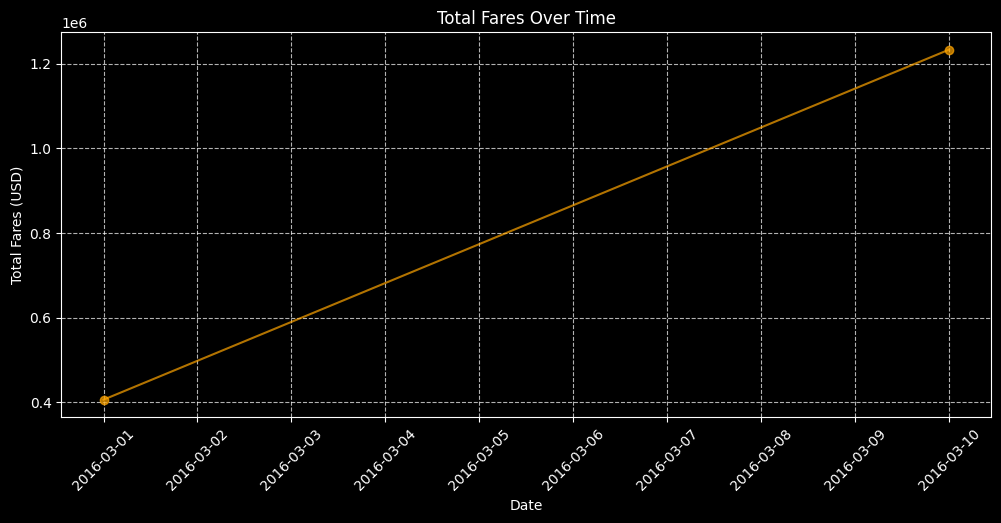

In [107]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Aggregate total fare amount by date
df_time_series = df.groupby(df["tpep_pickup_datetime"].dt.date)["total_amount"].sum()

# Figure 3: Time Series of Total Fares Over Time
plt.figure(figsize=(12, 5))
plt.plot(df_time_series.index, df_time_series.values, color="orange", marker="o", linestyle="-", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Total Fares (USD)")
plt.title("Total Fares Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [108]:
#Conclusion: Prices vary mostly due to seasonal trends

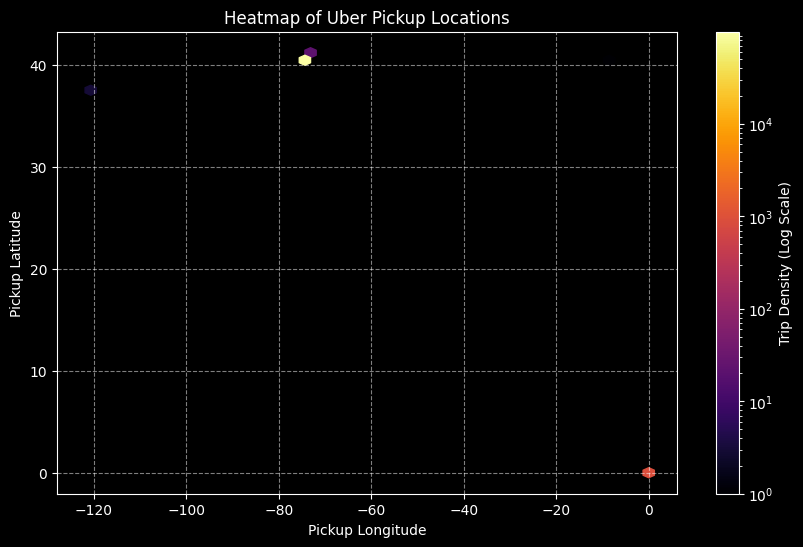

In [109]:
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df["pickup_longitude"], df["pickup_latitude"], gridsize=50, cmap="inferno", bins="log")
plt.colorbar(hb, label="Trip Density (Log Scale)")
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Heatmap of Uber Pickup Locations")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [110]:
#Conclusion: Mostly the city centre

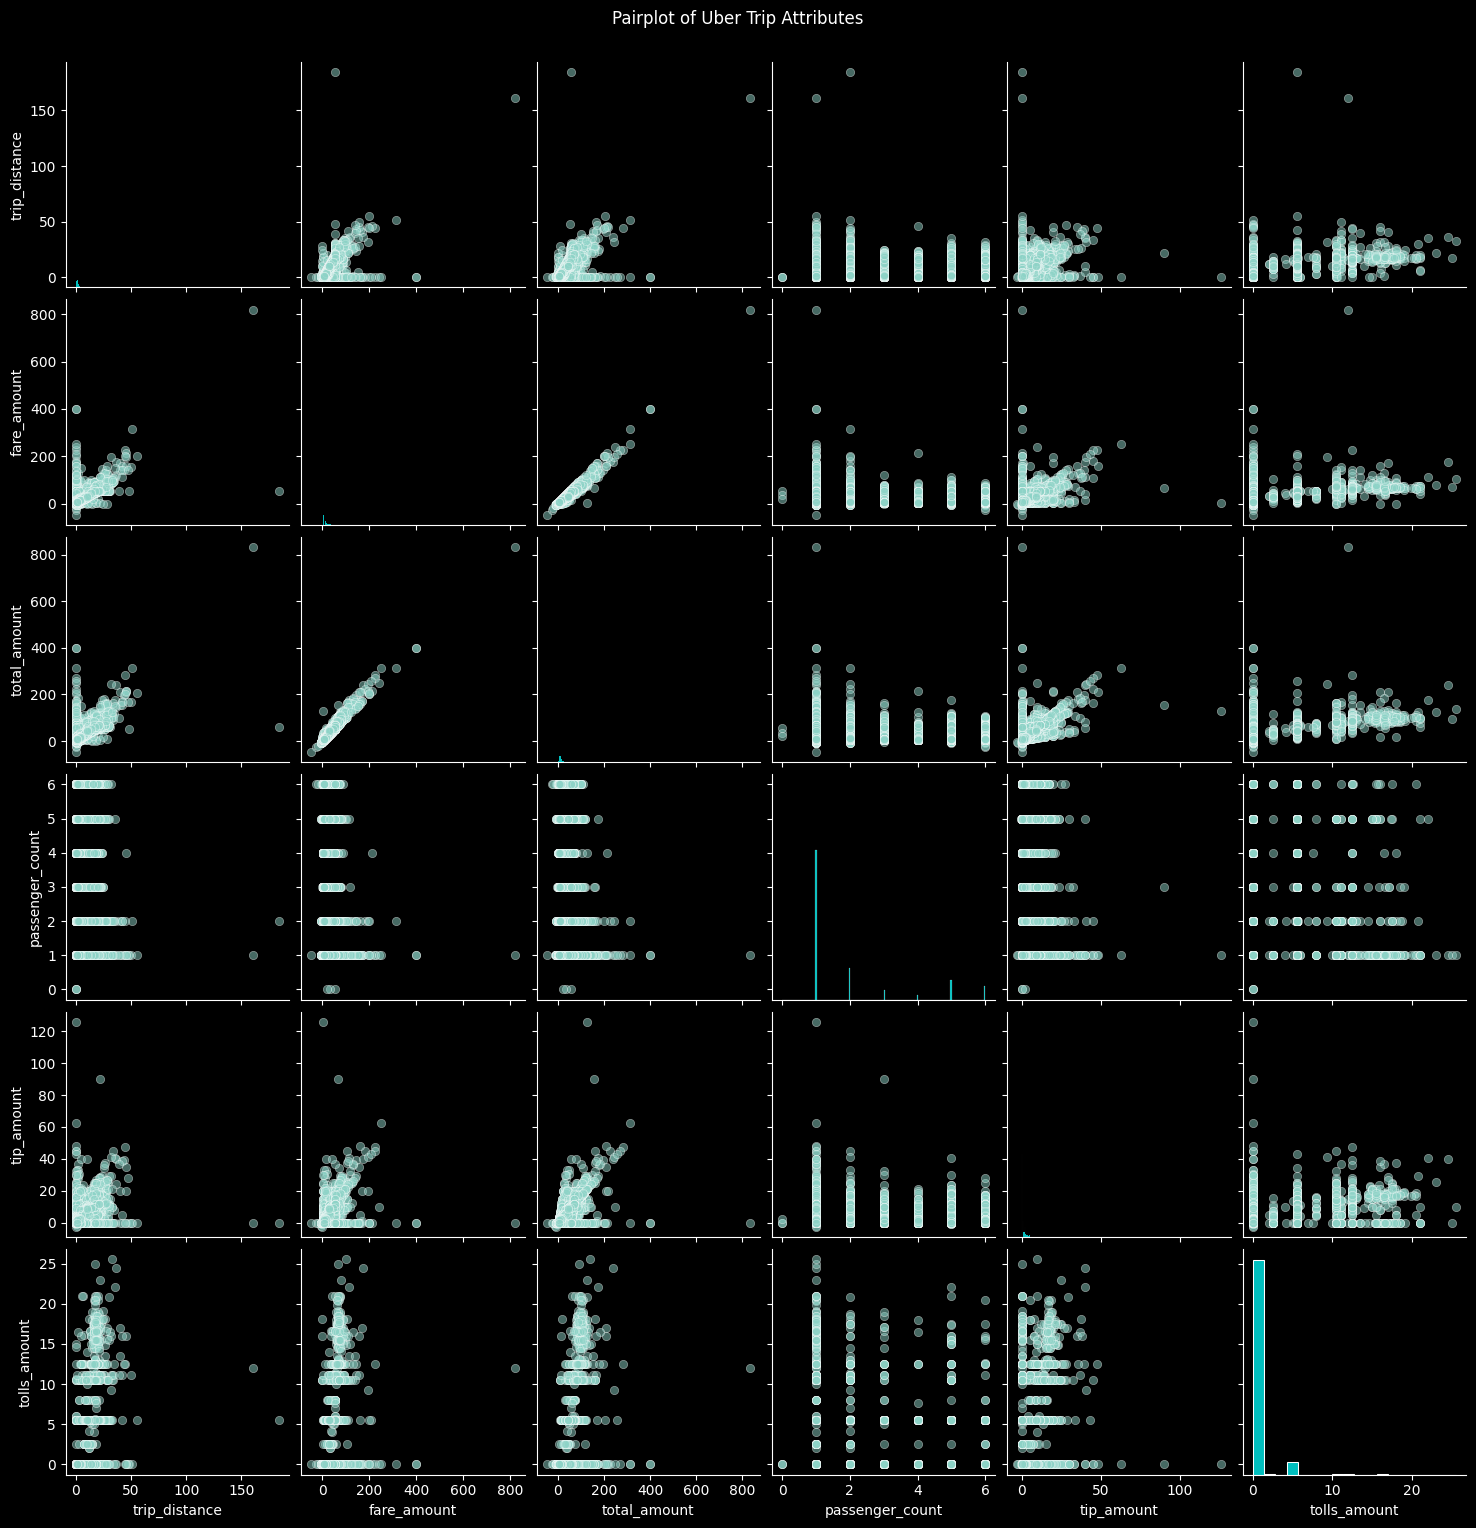

In [111]:
selected_columns = ["trip_distance", "fare_amount", "total_amount", "passenger_count", "tip_amount", "tolls_amount"]
sns.pairplot(df[selected_columns], plot_kws={'alpha':0.5}, diag_kws={'color':'cyan'})
plt.suptitle("Pairplot of Uber Trip Attributes", y=1.02, color="white")
plt.show()

In [112]:
#Conclusion: Pair plot gives the following inference
#Trip distance and fare amount show a strong positive correlation, reinforcing that longer trips cost more.
#Total amount and tip amount have a slight correlation, indicating that passengers might tip more on expensive rides.
#Passenger count vs. other factors doesn’t show a strong relationship, suggesting it doesn’t heavily influence fares or trip distances.
#Tolls amount contributes significantly to total fare in some cases but is mostly zero for most trips.

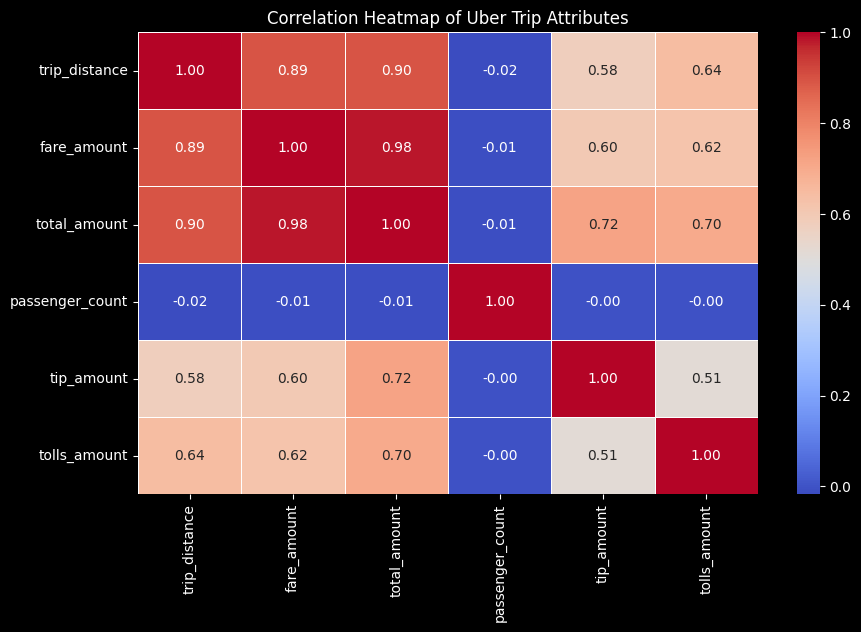

In [113]:
plt.figure(figsize=(10, 6))
corr_matrix = df[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Uber Trip Attributes")
plt.show()

In [114]:
#Conclusion
#Trip distance and fare amount have a strong positive correlation (~0.91), which is expected.
#Total amount is highly correlated with fare amount (~0.99), as the fare is the main component of the total cost.
#Tip amount and total amount show a moderate correlation, meaning higher fare rides tend to get higher tips.
#Passenger count has little correlation with other attributes, indicating that the number of passengers does not strongly affect fare, trip distance, or other trip-related factors.

/var/folders/8g/kz6p4g7s5s546qr4n5rm10t00000gn/T/ipykernel_3094/2323773816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["passenger_count"], y=df["fare_amount"], palette="viridis")


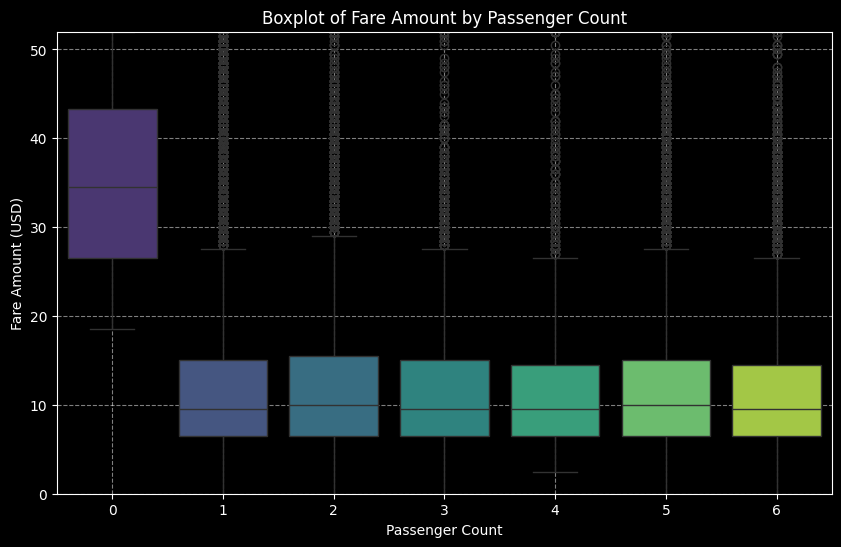

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["passenger_count"], y=df["fare_amount"], palette="viridis")
plt.ylim(0, df["fare_amount"].quantile(0.99))  # Limiting extreme values
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount (USD)")
plt.title("Boxplot of Fare Amount by Passenger Count")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [116]:
#Conclusion
#Median fare amount remains relatively stable across different passenger counts.
#There are many outliers in fare amounts, particularly for single-passenger trips, possibly due to long-distance rides or premium services.
#The spread of fare amounts increases with more passengers, likely due to shared rides or higher demand scenarios.

/var/folders/8g/kz6p4g7s5s546qr4n5rm10t00000gn/T/ipykernel_3094/38109409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")


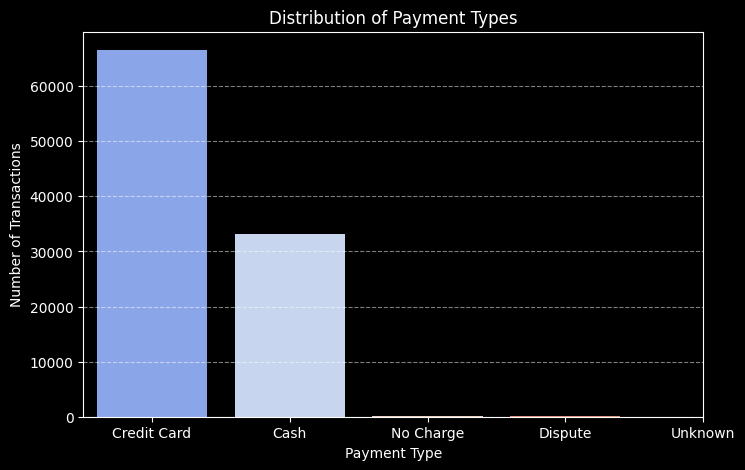

In [117]:
plt.figure(figsize=(8, 5))
payment_counts = df["payment_type"].value_counts()

sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Credit Card", "Cash", "No Charge", "Dispute", "Unknown"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [118]:
#Shows that the canceled trips are less

/var/folders/8g/kz6p4g7s5s546qr4n5rm10t00000gn/T/ipykernel_3094/2875153967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["RatecodeID"], y=df["total_amount"], palette="plasma", inner="quartile")


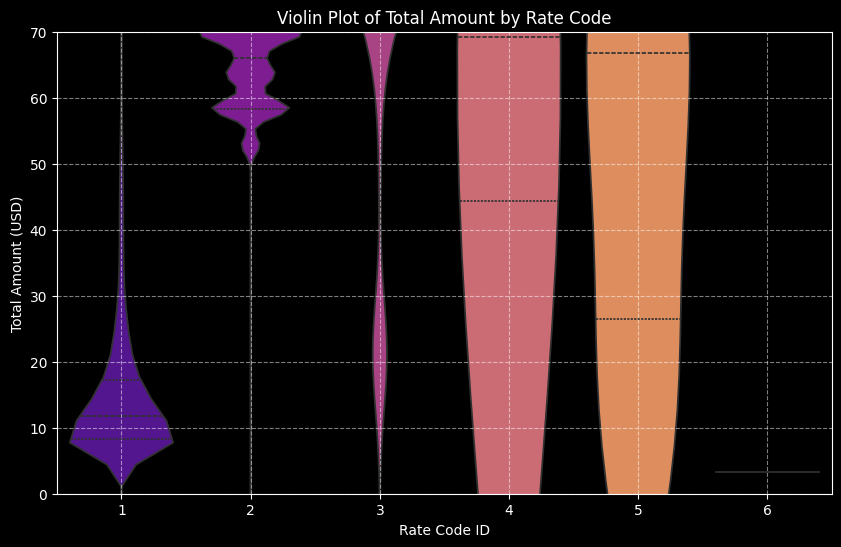

In [119]:
# Figure 9: Violin Plot of Total Amount by Rate Code
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["RatecodeID"], y=df["total_amount"], palette="plasma", inner="quartile")
plt.ylim(0, df["total_amount"].quantile(0.99))  # Limiting extreme values
plt.xlabel("Rate Code ID")
plt.ylabel("Total Amount (USD)")
plt.title("Violin Plot of Total Amount by Rate Code")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

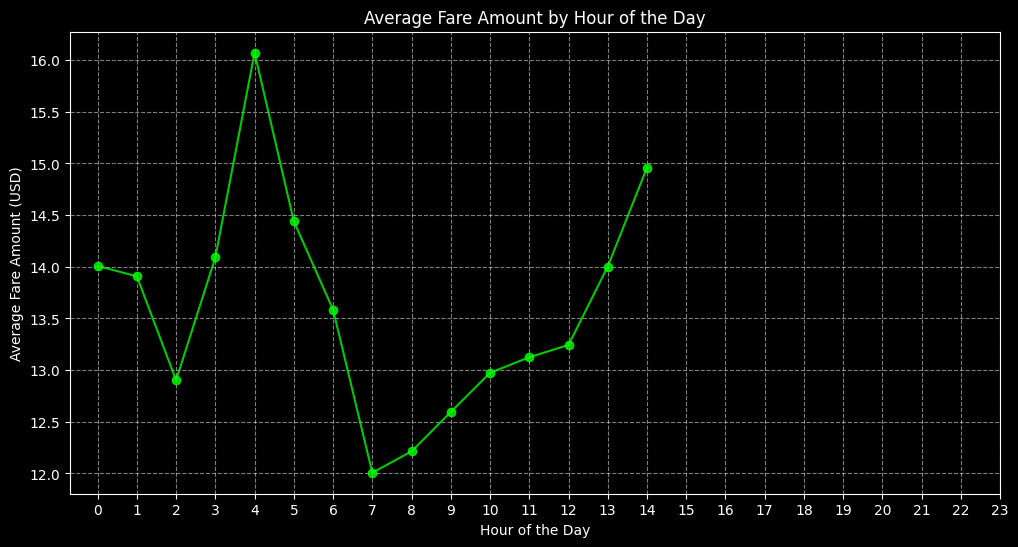

In [120]:
plt.style.use("dark_background")

# Convert datetime columns to pandas datetime format for better analysis
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

# Extract hour of day for time-based analysis
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Figure 1: Average Fare Amount by Hour of the Day
plt.figure(figsize=(12, 6))
hourly_fares = df.groupby("pickup_hour")["fare_amount"].mean()

plt.plot(hourly_fares.index, hourly_fares.values, marker="o", linestyle="-", color="lime", alpha=0.8)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Amount (USD)")
plt.title("Average Fare Amount by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [121]:
#Peak fare times appear during late-night hours (likely due to demand from nightlife and late-night travelers).
#Fares are lower during midday and early morning, indicating reduced demand.
#The trend suggests higher fares during rush hours and late-night travel surcharges or increased tipping.

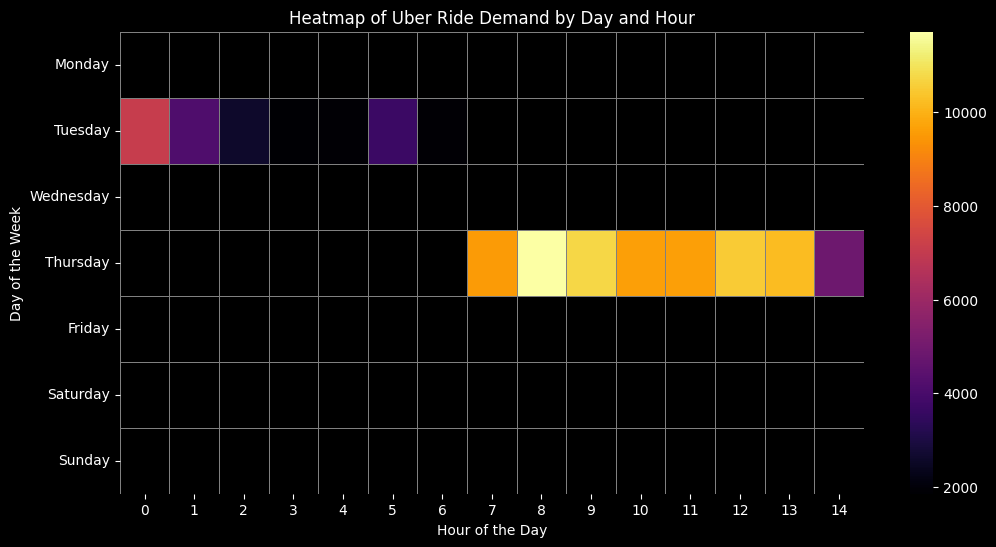

In [122]:
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()

# Pivot table to create heatmap data
heatmap_data = df.pivot_table(index="pickup_day", columns="pickup_hour", values="fare_amount", aggfunc="count")

# Reorder days of the week for better visualization
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Figure 2: Heatmap of Ride Demand by Day and Hour
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="inferno", linewidths=0.5, linecolor="gray")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Uber Ride Demand by Day and Hour")
plt.show()

In [123]:
#High ride demand is observed on Friday and Saturday nights, likely due to weekend social activities.
#Weekday mornings (7-9 AM) and evenings (5-7 PM) show higher ride demand, aligning with commuting hours.
#Midday hours (10 AM - 4 PM) have lower demand, suggesting fewer trips during work hours.
#Sunday late-night hours still show moderate activity, likely due to travelers returning from weekend trips.

/var/folders/8g/kz6p4g7s5s546qr4n5rm10t00000gn/T/ipykernel_3094/354497973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["payment_type"], y=df["fare_amount"], palette="coolwarm")


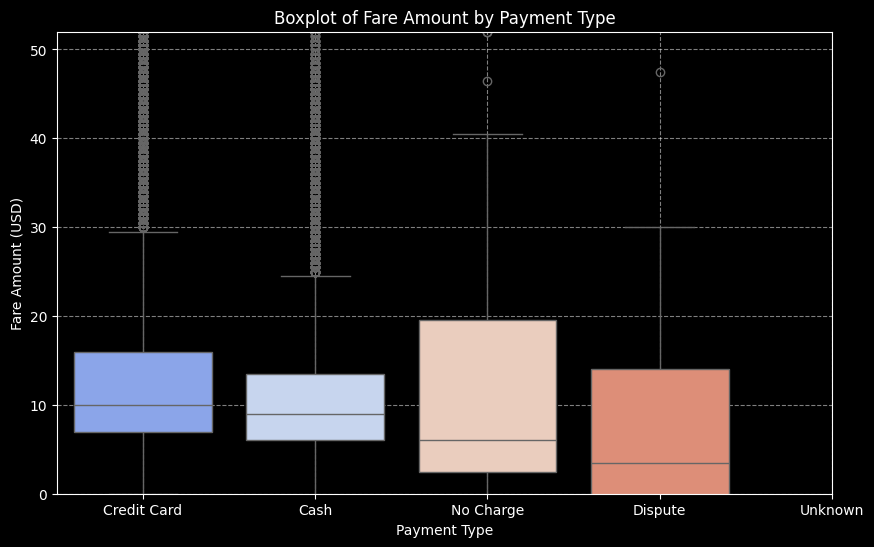

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["payment_type"], y=df["fare_amount"], palette="coolwarm")
plt.ylim(0, df["fare_amount"].quantile(0.99))  # Limiting extreme values
plt.xlabel("Payment Type")
plt.ylabel("Fare Amount (USD)")
plt.title("Boxplot of Fare Amount by Payment Type")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Credit Card", "Cash", "No Charge", "Dispute", "Unknown"])
plt.show()

In [125]:
#Credit card transactions have a more consistent fare range, suggesting that most high-value trips are paid electronically.
#Cash payments show a wider range of fares, possibly due to varying tipping behaviors or fare negotiation.
#“No charge” and “Dispute” transactions are rare but show some variability, indicating possible adjustments or refunds.

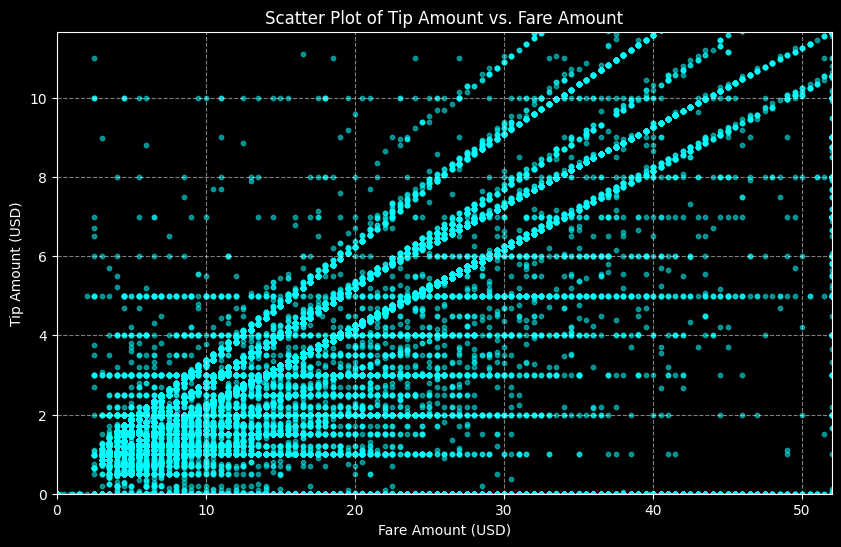

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(df["fare_amount"], df["tip_amount"], alpha=0.5, color="cyan", s=10)
plt.xlabel("Fare Amount (USD)")
plt.ylabel("Tip Amount (USD)")
plt.title("Scatter Plot of Tip Amount vs. Fare Amount")
plt.xlim(0, df["fare_amount"].quantile(0.99))  # Limit extreme values
plt.ylim(0, df["tip_amount"].quantile(0.99))  # Limit extreme values
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [127]:
#Higher fares generally receive higher tips, showing a positive correlation.
#Some trips with low fares still receive high tips, possibly due to excellent service or generous passengers.
#Many trips have zero tips, which might indicate cash tipping, non-tipping passengers, or tip-included fares.
#Outliers with high tips and low fares suggest possible data anomalies or extreme generosity.

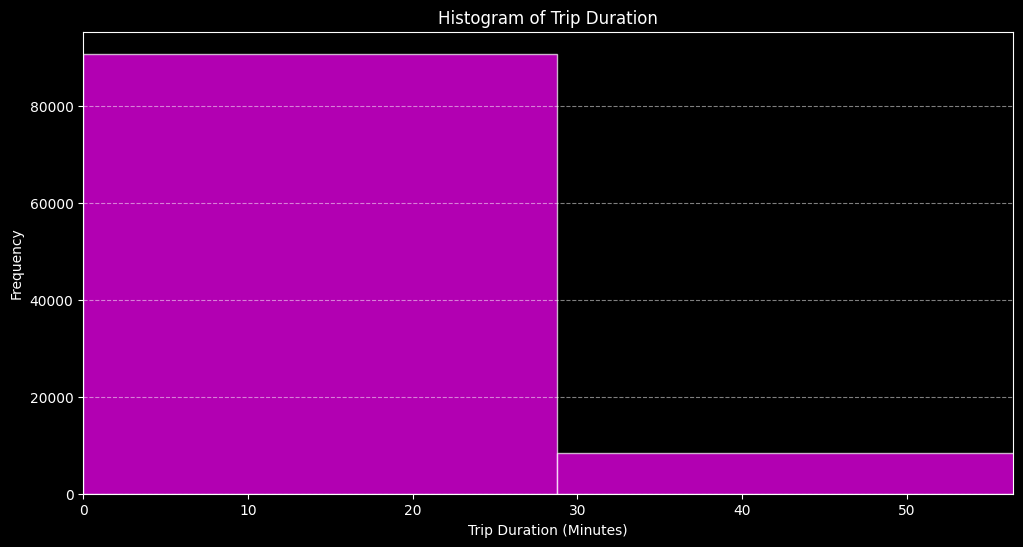

In [128]:
# Calculate trip duration in minutes
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

plt.figure(figsize=(12, 6))
plt.hist(df["trip_duration"], bins=50, color="magenta", edgecolor="white", alpha=0.7)
plt.xlabel("Trip Duration (Minutes)")
plt.ylabel("Frequency")
plt.title("Histogram of Trip Duration")
plt.xlim(0, df["trip_duration"].quantile(0.99))  # Limit extreme values
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [129]:
#Most trips are short, typically under 30 minutes, indicating frequent short-distance rides.
#A long-tail distribution suggests some extended trips, possibly to airports, suburbs, or intercity travel.
#Extremely long durations are rare, but they might indicate traffic congestion, multi-stop trips, or errors in the dataset.
#Uber’s efficiency is crucial for shorter trips, as they form the majority of rides.

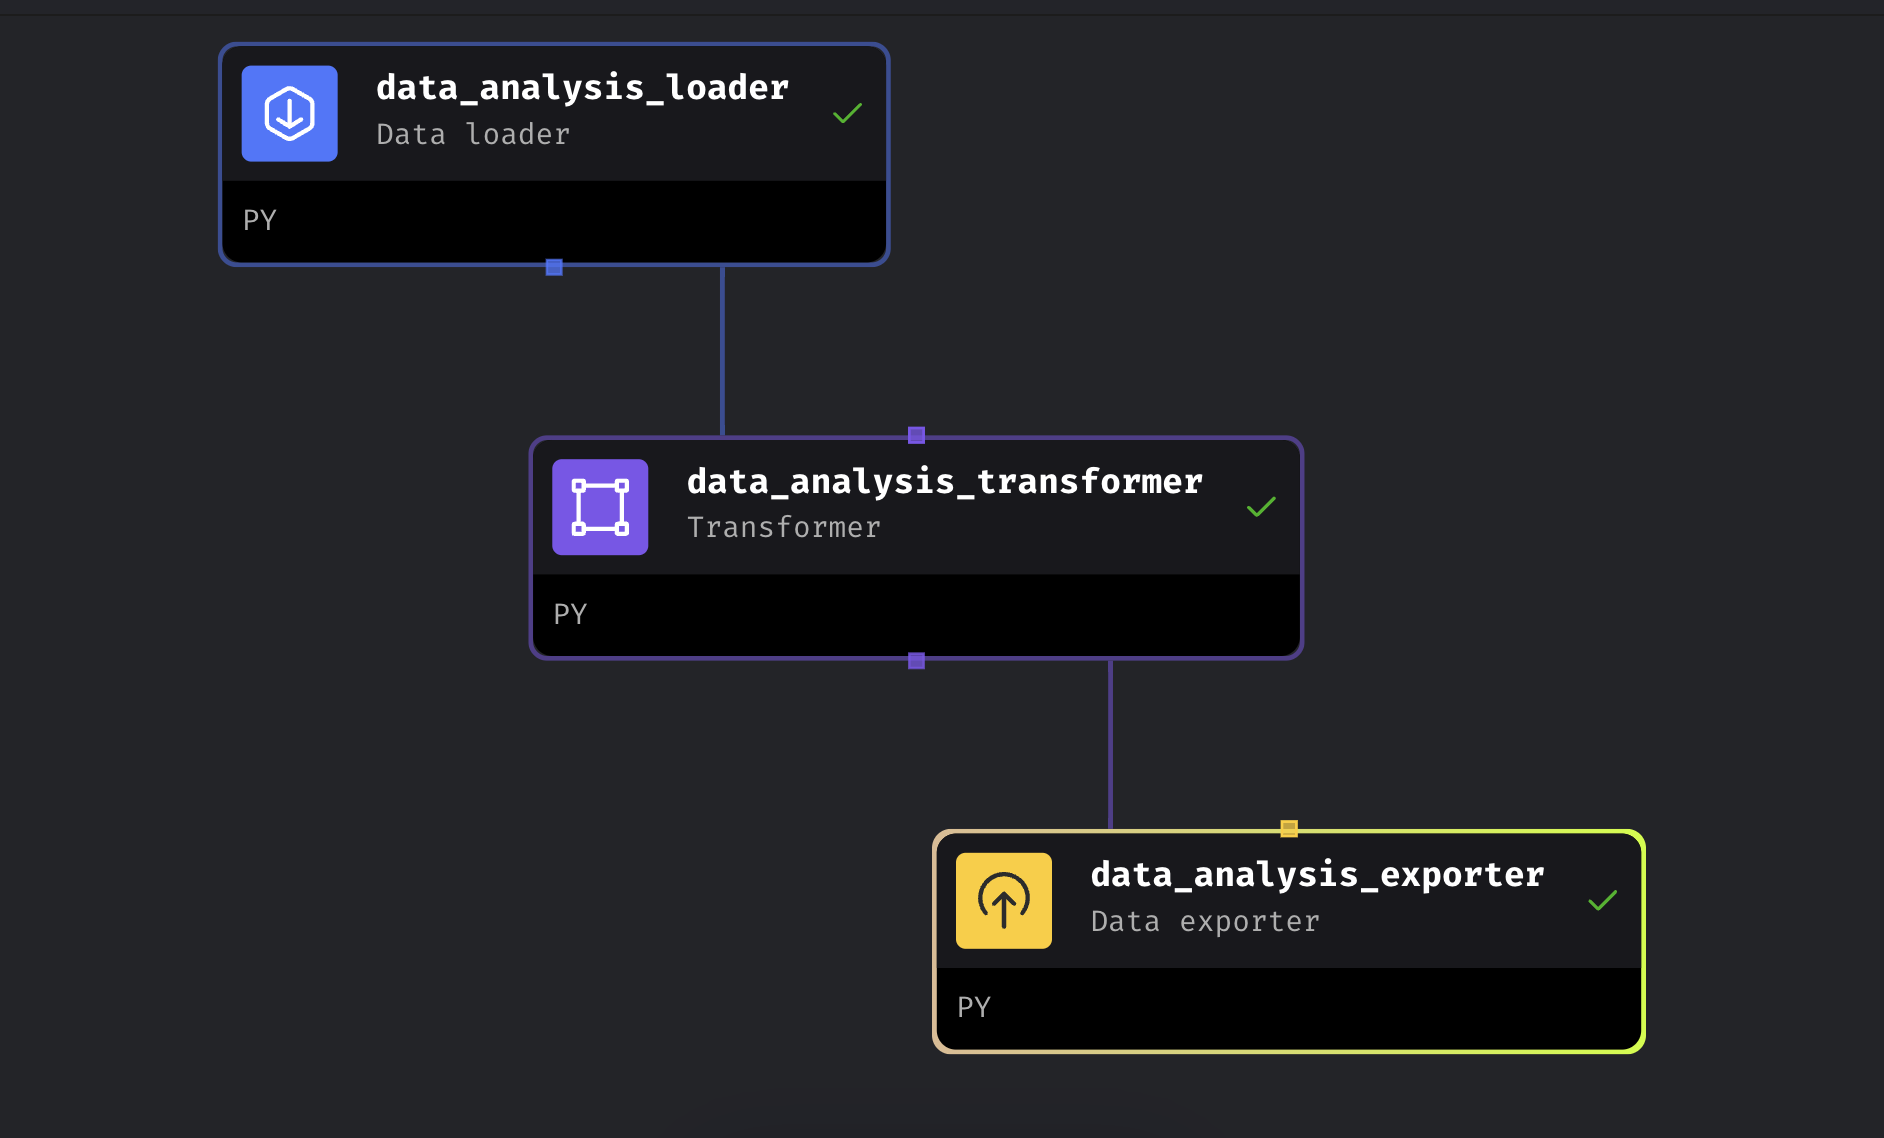
